In [1]:
library(readr)
library(tidyverse)
library(ggplot2)
library(caTools)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ dplyr   0.8.5
✔ tibble  3.0.0     ✔ stringr 1.4.0
✔ tidyr   1.0.2     ✔ forcats 0.5.0
✔ purrr   0.3.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
## 1. General overview

In [2]:
raw_dataset <- read_csv('dataset/imdb_1972-2019.csv')

Parsed with column specification:
cols(
  Id = col_double(),
  Title = col_character(),
  Year = col_double(),
  Rating = col_double(),
  Metascore = col_double(),
  Votes = col_double(),
  Description = col_character(),
  Genre = col_character(),
  `Runtime (Minutes)` = col_double(),
  `Revenue (Millions)` = col_double(),
  Actors = col_character(),
  Director = col_character()
)


In [3]:
head(raw_dataset)

Id,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),Actors,Director
0,Avengers: Endgame,2019,8.5,78,648248,"After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.","Action, Adventure, Drama",181,858.37,"Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth","Anthony Russo, Joe Russo"
1,Spider-Man: Far from Home,2019,7.6,69,255849,"Following the events of Avengers: Endgame (2019), Spider-Man must step up to take on new threats in a world that has changed forever.","Action, Adventure, Sci-Fi",129,388.53,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaal, Marisa Tomei",Jon Watts
2,Toy Story 4,2019,7.9,84,146740,"When a new toy called ""Forky"" joins Woody and the gang, a road trip alongside old and new friends reveals how big the world can be for a toy.","Animation, Adventure, Comedy",100,433.03,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",Josh Cooley
3,Jumanji: The Next Level,2019,7.0,58,63856,"In Jumanji: The Next Level, the gang is back but the game has changed. As they return to rescue one of their own, the players will have to brave parts unknown from arid deserts to snowy mountains, to escape the world's most dangerous game.","Action, Adventure, Comedy",123,0.00,"Dwayne Johnson, Jack Black, Kevin Hart, Karen Gillan",Jake Kasdan
4,The Lighthouse,2019,7.8,83,50595,Two lighthouse keepers try to maintain their sanity while living on a remote and mysterious New England island in the 1890s.,"Drama, Fantasy, Horror",109,0.43,"Robert Pattinson, Willem Dafoe, Valeriia Karaman",Robert Eggers
5,El Camino: A Breaking Bad Movie,2019,7.4,72,145770,"El Camino: A Breaking Bad Movie follows fugitive Jesse Pinkman as he runs from his captors, the law and his past.","Action, Drama",122,0.00,"Aaron Paul, Jonathan Banks, Matt Jones, Charles Baker",Vince Gilligan


In [4]:
glimpse(raw_dataset)

Rows: 5,834
Columns: 12
$ Id                   <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ Title                <chr> "Avengers: Endgame", "Spider-Man: Far from Home"…
$ Year                 <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, …
$ Rating               <dbl> 8.5, 7.6, 7.9, 7.0, 7.8, 7.4, 7.5, 6.9, 7.0, 6.7…
$ Metascore            <dbl> 78, 69, 84, 58, 83, 72, 73, 64, 53, 58, 55, 54, …
$ Votes                <dbl> 648248, 255849, 146740, 63856, 50595, 145770, 21…
$ Description          <chr> "After the devastating events of Avengers: Infin…
$ Genre                <chr> "Action, Adventure, Drama", "Action, Adventure, …
$ `Runtime (Minutes)`  <dbl> 181, 129, 100, 123, 109, 122, 131, 123, 128, 169…
$ `Revenue (Millions)` <dbl> 858.37, 388.53, 433.03, 0.00, 0.43, 0.00, 171.02…
$ Actors               <chr> "Robert Downey Jr., Chris Evans, Mark Ruffalo, C…
$ Director             <chr> "Anthony Russo, Joe Russo", "Jon Watts", "Josh C…


In [ ]:
## 2. Preprocessing


In [6]:
movies_per_director <- raw_dataset %>% group_by(Director) %>% count(Director)  %>% ungroup()
head(movies_per_director)

mpd <- c()
for (val in raw_dataset$Director) {
    mpd <- c(mpd, movies_per_director$n[movies_per_director$Director == val])
}

ds <- cbind(raw_dataset, mpd)

Director,n
"Aaron Blaise, Robert Walker",1
Aaron Schneider,1
"Aaron Seltzer, Jason Friedberg",1
Aaron Sorkin,2
"Abby Kohn, Marc Silverstein",1
Abdul Malik Abbott,1


In [8]:
ds <- ds %>% mutate(score = (Rating*10+Metascore)/2)

In [9]:
trimmed_ds = select(ds, c('Id', 'Year', 'Rating', 'Director', 'Metascore', 'Votes', 'Runtime (Minutes)', 
                               'Revenue (Millions)', 'mpd', 'score')) %>%
             rename(Runtime = 'Runtime (Minutes)', Revenue = 'Revenue (Millions)')

In [10]:
head(trimmed_ds)

Id,Year,Rating,Director,Metascore,Votes,Runtime,Revenue,mpd,score
0,2019,8.5,"Anthony Russo, Joe Russo",78,648248,181,858.37,3,81.5
1,2019,7.6,Jon Watts,69,255849,129,388.53,1,72.5
2,2019,7.9,Josh Cooley,84,146740,100,433.03,1,81.5
3,2019,7.0,Jake Kasdan,58,63856,123,0.00,4,64.0
4,2019,7.8,Robert Eggers,83,50595,109,0.43,1,80.5
5,2019,7.4,Vince Gilligan,72,145770,122,0.00,1,73.0


In [11]:
glimpse(trimmed_ds)

Rows: 5,834
Columns: 10
$ Id        <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ Year      <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,…
$ Rating    <dbl> 8.5, 7.6, 7.9, 7.0, 7.8, 7.4, 7.5, 6.9, 7.0, 6.7, 6.9, 6.9,…
$ Director  <chr> "Anthony Russo, Joe Russo", "Jon Watts", "Josh Cooley", "Ja…
$ Metascore <dbl> 78, 69, 84, 58, 83, 72, 73, 64, 53, 58, 55, 54, 60, 81, 72,…
$ Votes     <dbl> 648248, 255849, 146740, 63856, 50595, 145770, 213393, 38959…
$ Runtime   <dbl> 181, 129, 100, 123, 109, 122, 131, 123, 128, 169, 99, 142, …
$ Revenue   <dbl> 858.37, 388.53, 433.03, 0.00, 0.43, 0.00, 171.02, 426.83, 3…
$ mpd       <int> 3, 1, 1, 4, 1, 1, 2, 3, 8, 2, 5, 6, 3, 2, 2, 2, 9, 9, 9, 8,…
$ score     <dbl> 81.5, 72.5, 81.5, 64.0, 80.5, 73.0, 74.0, 66.5, 61.5, 62.5,…


In [12]:
summary(trimmed_ds)

       Id              Year          Rating        Director        
 Min.   :   0.0   Min.   :1972   Min.   :1.500   Length:5834       
 1st Qu.: 909.2   1st Qu.:1995   1st Qu.:5.900   Class :character  
 Median :2367.5   Median :2004   Median :6.500   Mode  :character  
 Mean   :2402.8   Mean   :2002   Mean   :6.435                     
 3rd Qu.:3825.8   3rd Qu.:2010   3rd Qu.:7.100                     
 Max.   :5284.0   Max.   :2019   Max.   :9.300                     
                                                                   
   Metascore         Votes            Runtime         Revenue      
 Min.   : 1.00   Min.   :     29   Min.   : 48.0   Min.   :  0.00  
 1st Qu.:42.00   1st Qu.:  11356   1st Qu.: 94.0   1st Qu.:  1.92  
 Median :55.00   Median :  35152   Median :104.0   Median : 17.32  
 Mean   :54.65   Mean   :  89992   Mean   :106.9   Mean   : 40.10  
 3rd Qu.:67.00   3rd Qu.:  96570   3rd Qu.:116.0   3rd Qu.: 49.87  
 Max.   :99.00   Max.   :2182098   Max.   :317.0

In [17]:
print('Initial # of rows: ') 
print(dim(trimmed_ds))
dataset <- trimmed_ds %>% drop_na() 
print('# of rows after excluding the missing values: ') 
print(dim(dataset))

[1] "Numarul initial de randuri: "
[1] 5834   10
[1] "Numarul de randuri dupa eliminarea valorilor lipsa: "
[1] 5735   10


In [ ]:
## 3. Descriptive Analysis

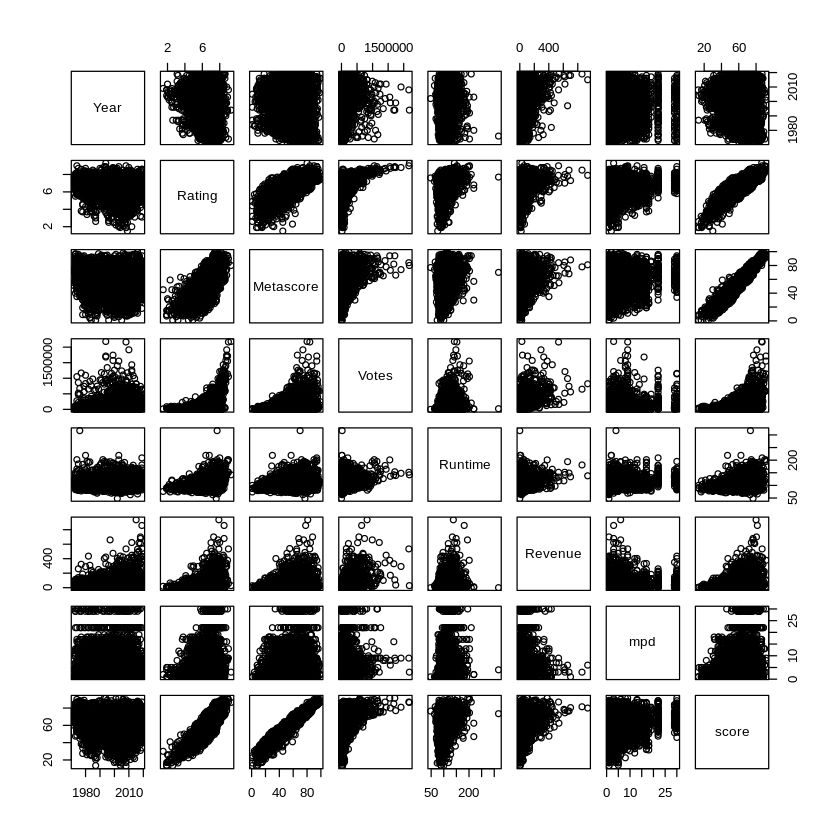

In [19]:
pairs(dataset %>% select(-Id, -Director))

In [20]:
cor(dataset %>% select(-Id, -Director))

,Year,Rating,Metascore,Votes,Runtime,Revenue,mpd,score
Year,1.000000000,-0.0914920,-0.06865997,0.1083707,-0.005470297,0.1152365,-0.1651129,-0.0820857
Rating,-0.091492000,1.0000000,0.72762230,0.4072913,0.382991522,0.1873945,0.1932107,0.8814769
Metascore,-0.068659966,0.7276223,1.00000000,0.2742275,0.280616186,0.1404538,0.1833772,0.9653196
Votes,0.108370745,0.4072913,0.27422752,1.0000000,0.338182908,0.6208562,0.2075431,0.3437859
Runtime,-0.005470297,0.3829915,0.28061619,0.3381829,1.000000000,0.2679864,0.2891487,0.3389358
Revenue,0.115236505,0.1873945,0.14045376,0.6208562,0.267986443,1.0000000,0.1566399,0.1680073
mpd,-0.165112940,0.1932107,0.18337725,0.2075431,0.289148666,0.1566399,1.0000000,0.1997693
score,-0.082085705,0.8814769,0.96531965,0.3437859,0.338935764,0.1680073,0.1997693,1.0000000


In [ ]:
### 3.1 Data Analysis

x,freq
1972,5
1973,30
1974,35
1975,33
1976,40
1977,45


25%  50%  75% 
1995 2004 2010

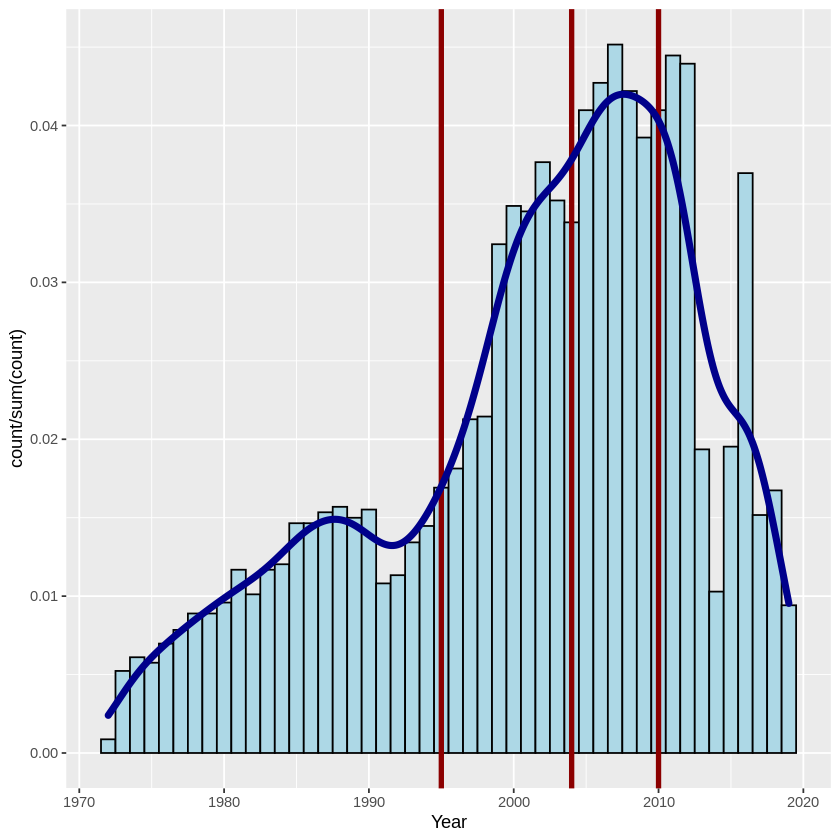

In [22]:
# Year
year_freq <- data.frame(plyr::count(dataset$Year)) 
head(year_freq)

ggplot(dataset, aes(x = Year)) +
    geom_histogram(aes(y = stat(count / sum(count))), bins=48, color="black", fill="lightblue")  +
    geom_vline(xintercept = quantile(dataset$Year, probs = c(0.25, 0.5, 0.75)), color='darkred', size=1.5)+
    geom_density(color='darkblue', size=2)
quantile(dataset$Year, probs = c(0.25, 0.5, 0.75))

x,freq
1.5,1
1.9,3
2.0,2
2.1,2
2.2,2
2.3,1


,x,freq
69,8.6,10
70,8.7,5
71,8.8,3
72,8.9,3
73,9.0,2
74,9.3,1


25% 50% 75% 
5.9 6.5 7.1

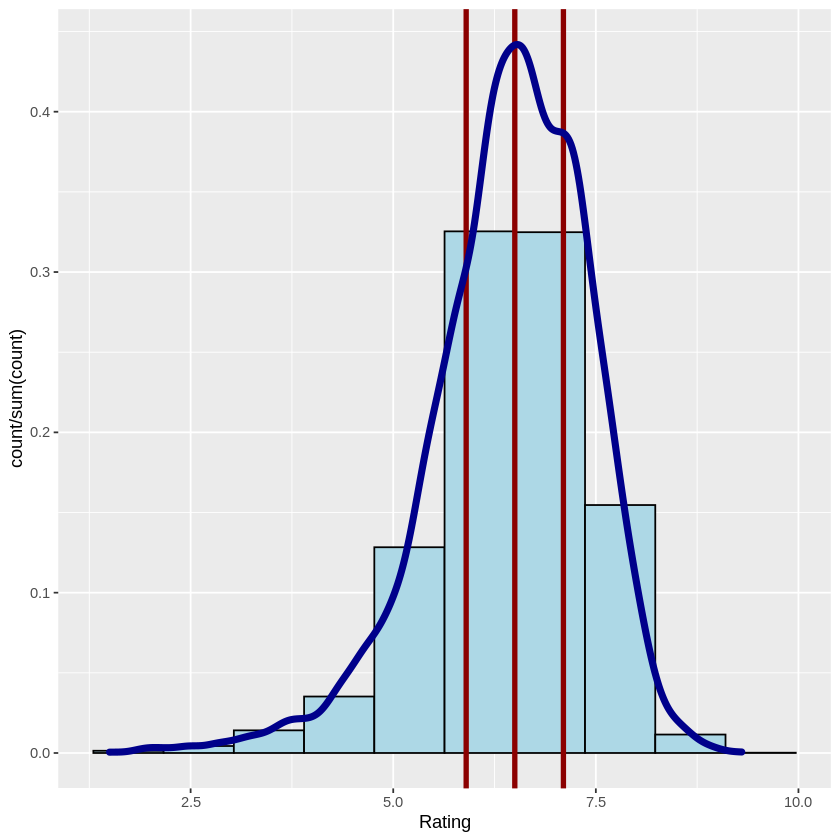

In [25]:
# Rating
rating_freq <- data.frame(plyr::count(dataset$Rating))
head(rating_freq)
tail(rating_freq)

ggplot(dataset, aes(x = Rating)) +
    geom_histogram(aes(y = stat(count / sum(count))), bins=10, color="black", fill="lightblue")  +
    geom_vline(xintercept = quantile(dataset$Rating, probs = c(0.25, 0.5, 0.75)), color='darkred', size=1.5)+
    geom_density(color='darkblue', size=2)
quantile(dataset$Rating, probs = c(0.25, 0.5, 0.75))

25% 50% 75% 
 42  55  67

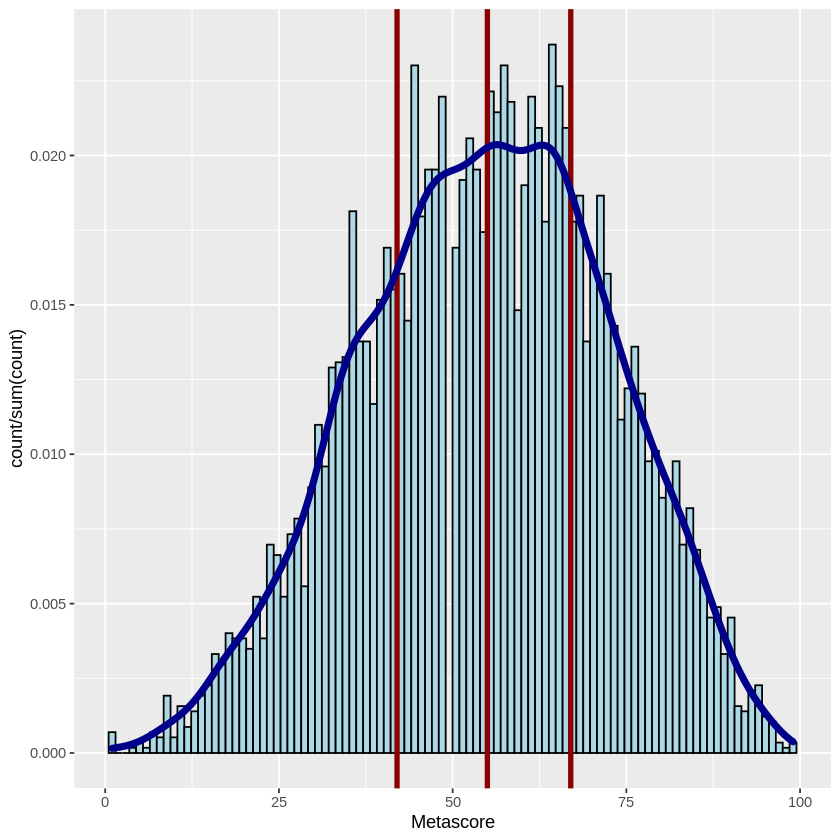

In [26]:
# Metascore
ggplot(dataset, aes(x = Metascore)) +
    geom_histogram(aes(y = stat(count / sum(count))), bins=100, color="black", fill="lightblue")  +
    geom_vline(xintercept = quantile(dataset$Metascore, probs = c(0.25, 0.5, 0.75)), color='darkred', size=1.5)+
    geom_density(color='darkblue', size=2)
quantile(dataset$Metascore, probs = c(0.25, 0.5, 0.75))

25%     50%     75% 
11948.5 36314.0 98402.0

[1] 2182098

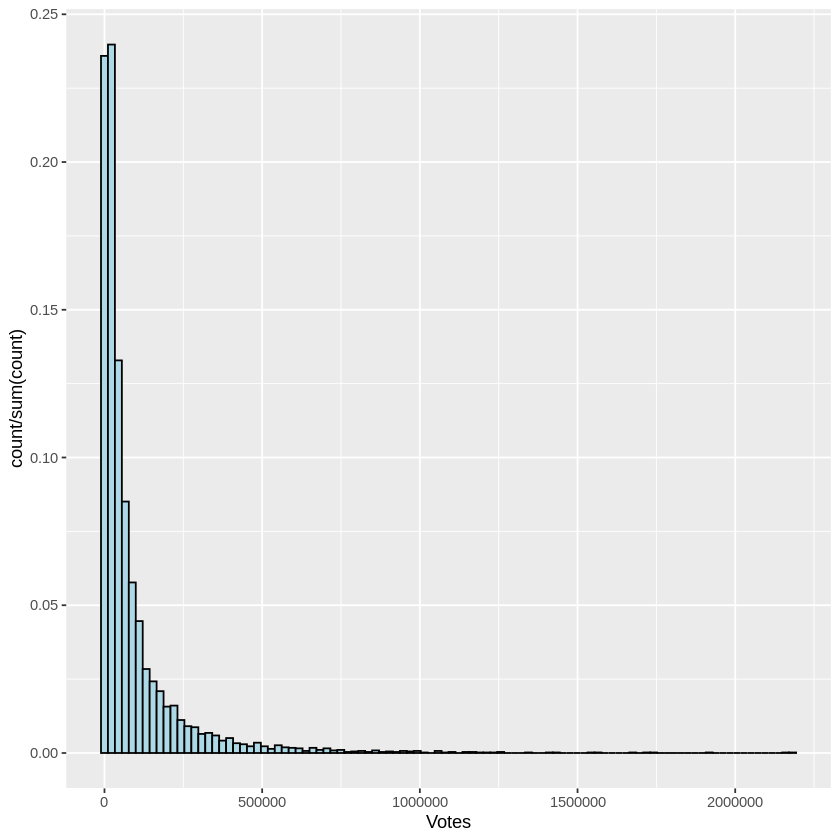

In [27]:
# Votes
ggplot(dataset, aes(x = Votes)) +
    geom_histogram(aes(y = stat(count / sum(count))), bins=100, color="black", fill="lightblue")  
quantile(dataset$Votes, probs = c(0.25, 0.5, 0.75))
max(dataset$Votes)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


25% 50% 75% 
 95 104 116

[1] 48

[1] 317

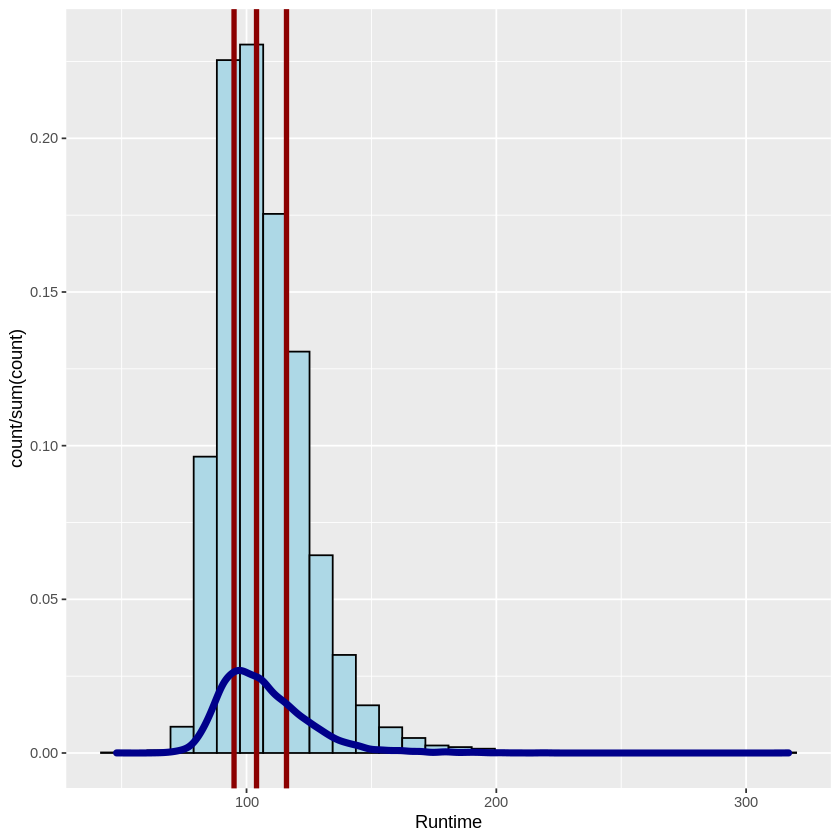

In [28]:
# Runtime
ggplot(dataset, aes(x = Runtime)) +
    geom_histogram(aes(y = stat(count / sum(count))), color="black", fill="lightblue")  +
    geom_vline(xintercept = quantile(dataset$Runtime, probs = c(0.25, 0.5, 0.75)), color='darkred', size=1.5)+
    geom_density(color='darkblue', size=2)
quantile(dataset$Runtime, probs = c(0.25, 0.5, 0.75))
min(dataset$Runtime)
max(dataset$Runtime)

25%      50%      75%      99% 
  1.9200  17.3200  49.8500 320.2136

[1] 0

[1] 936.66

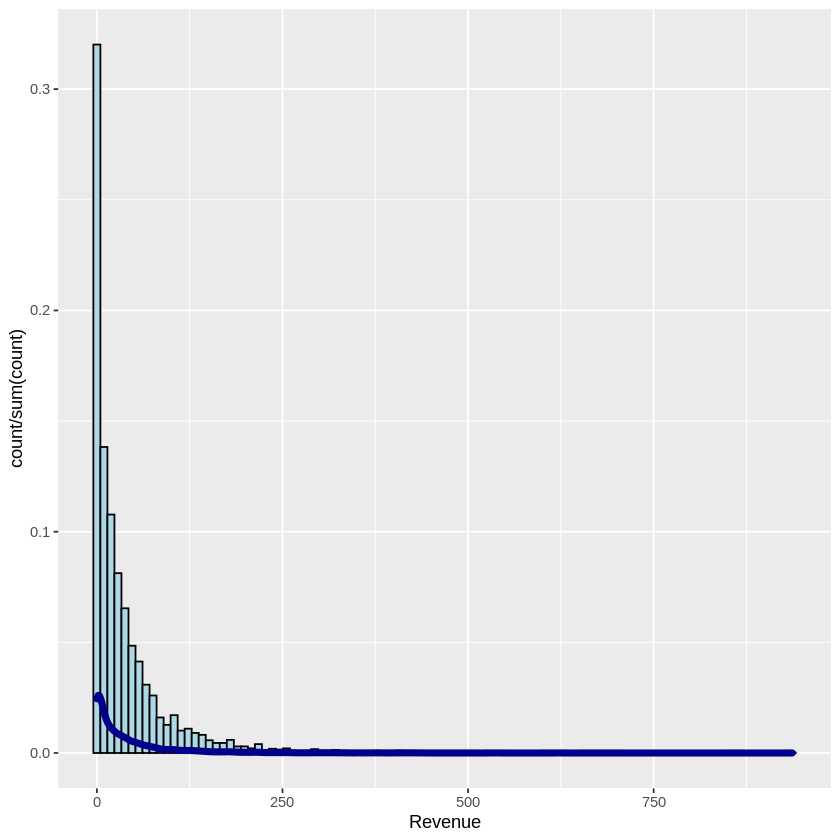

In [49]:
# Revenue
ggplot(dataset, aes(x = Revenue)) +
    geom_histogram(aes(y = stat(count / sum(count))), bins=100, color="black", fill="lightblue")  +
    geom_density(color='darkblue', size=2)

quantile(dataset$Revenue, probs = c(0.25, 0.5, 0.75, 0.99))
min(dataset$Revenue)
max(dataset$Revenue)

25% 50% 75% 
  1   3   7

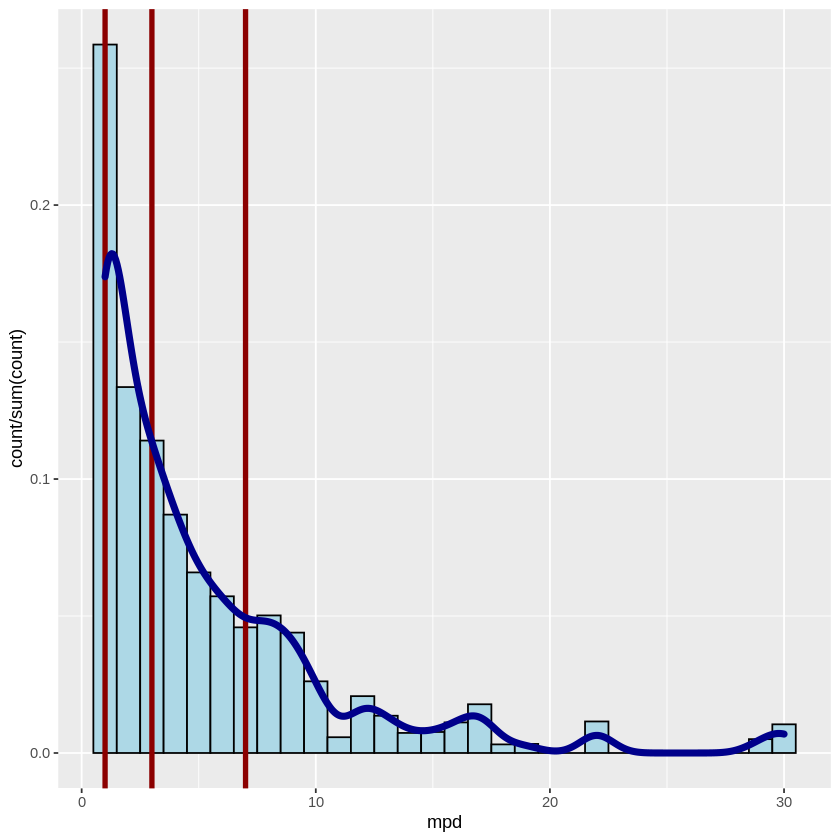

In [31]:
# mpd
ggplot(dataset, aes(x = mpd)) +
    geom_histogram(aes(y = stat(count / sum(count))), bins=30, color="black", fill="lightblue")  +
    geom_vline(xintercept = quantile(dataset$mpd, probs = c(0.25, 0.5, 0.75)), color='darkred', size=1.5)+
    geom_density(color='darkblue', size=2)
quantile(dataset$mpd, probs = c(0.25, 0.5, 0.75))

In [ ]:
### 3.2 1v1 analysis of the features

`geom_smooth()` using formula 'y ~ x'


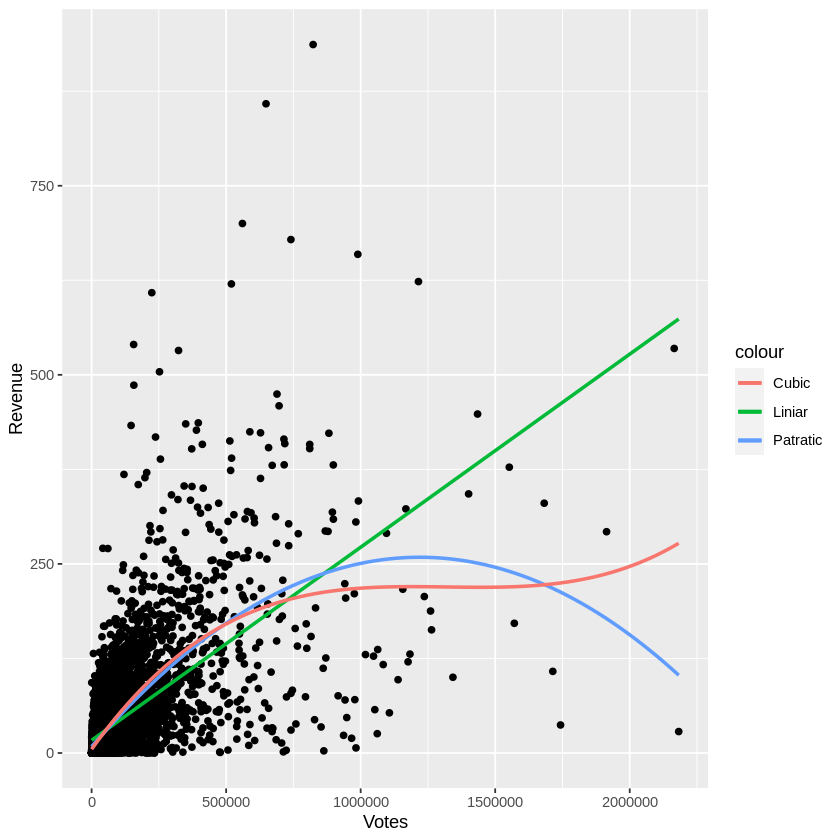

In [32]:
# Votes ~ Revenue
ggplot(dataset, aes(x = Votes, y = Revenue)) + 
    geom_point() + 
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

`geom_smooth()` using formula 'y ~ x'


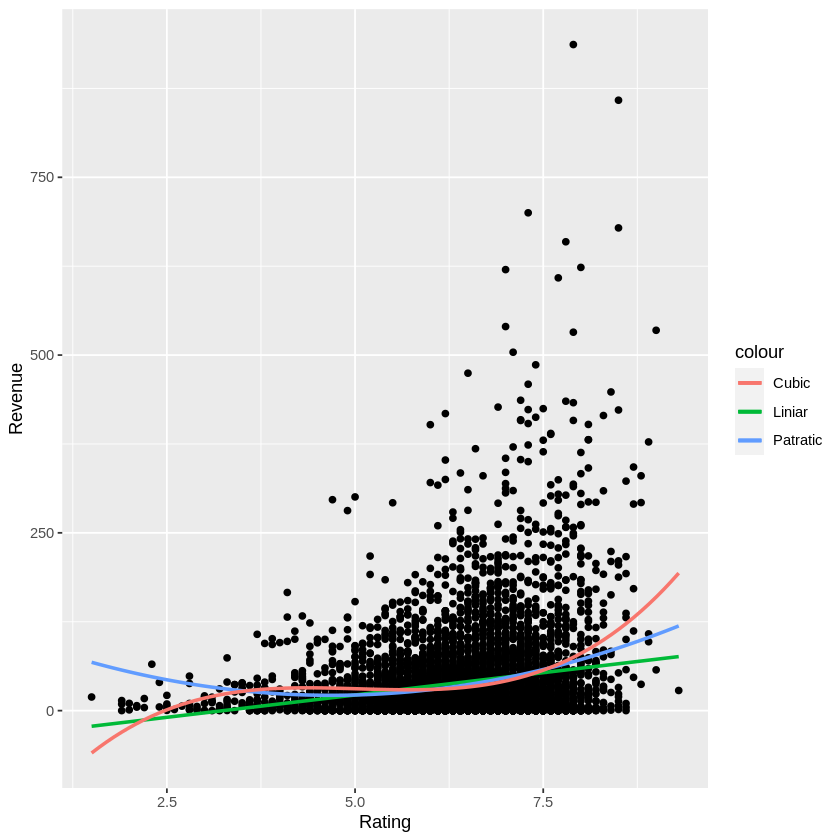

In [33]:
# Rating ~ Votes
ggplot(dataset, aes(x = Rating, y = Revenue)) +
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

`geom_smooth()` using formula 'y ~ x'


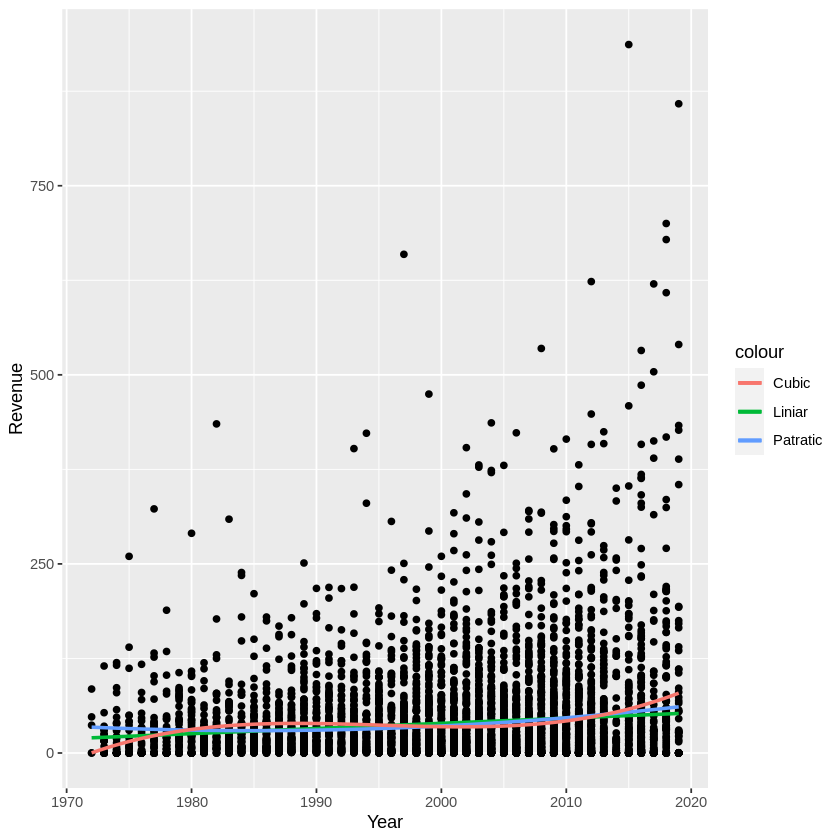

In [35]:
# Year ~ Revenue
ggplot(dataset, aes(x = Year, y = Revenue)) +
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

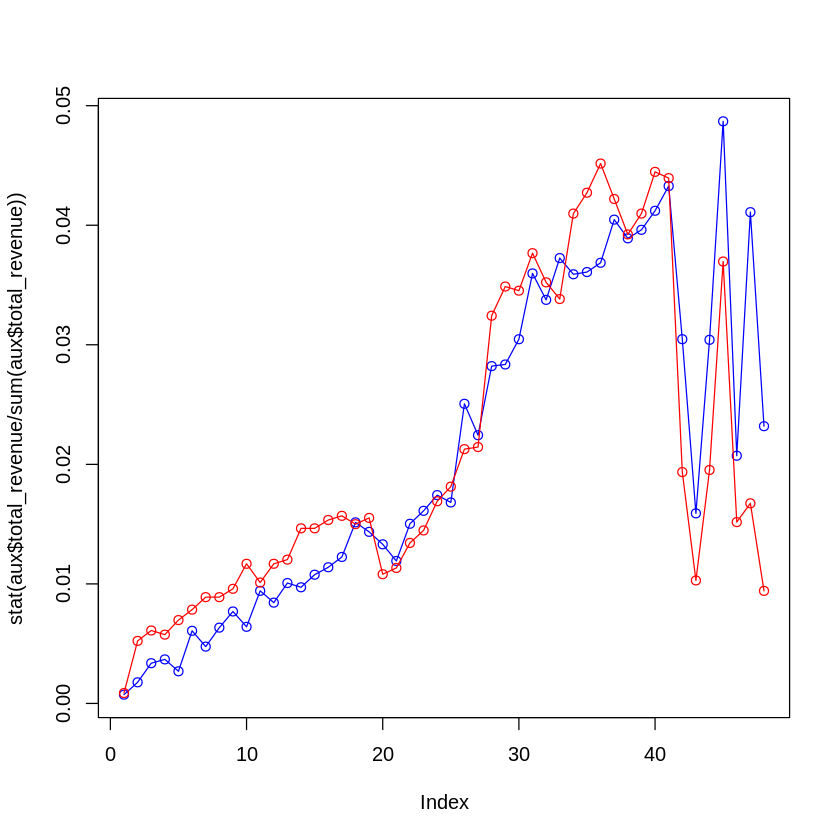

In [36]:
aux <- dataset %>% group_by(Year) %>% summarise( count = n(),total_revenue = sum(Revenue))

plot(stat(aux$total_revenue / sum(aux$total_revenue)), type="o", col="blue")
lines(stat(aux$count/ sum(aux$count)), type="o", col="red")

`geom_smooth()` using formula 'y ~ x'


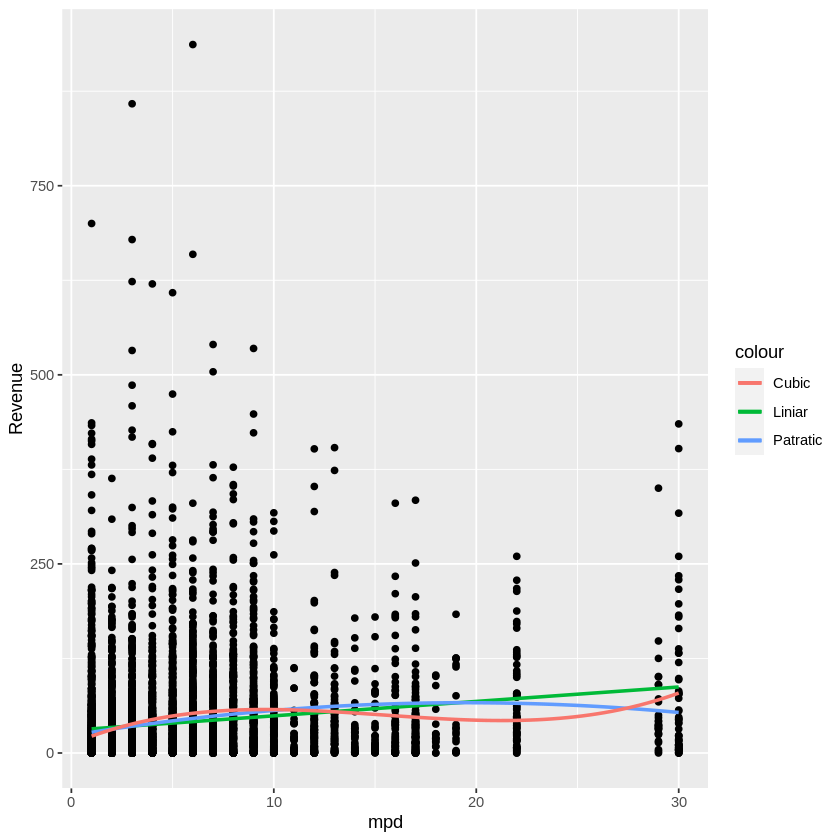

In [37]:
# mpd ~ Revenue
ggplot(dataset, aes(x = mpd, y = Revenue)) +
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

In [40]:
aux <- dataset %>% group_by(Director) %>% summarise( count = n(),total_revenue = sum(Revenue)) %>% mutate(rev_per_movie=total_revenue/count)

head(aux)

Director,count,total_revenue,rev_per_movie
"Aaron Blaise, Robert Walker",1,85.34,85.34
Aaron Schneider,1,9.18,9.18
"Aaron Seltzer, Jason Friedberg",1,48.55,48.55
Aaron Sorkin,2,57.56,28.78
"Abby Kohn, Marc Silverstein",1,48.80,48.80
Abdul Malik Abbott,1,2.10,2.10


`geom_smooth()` using formula 'y ~ x'


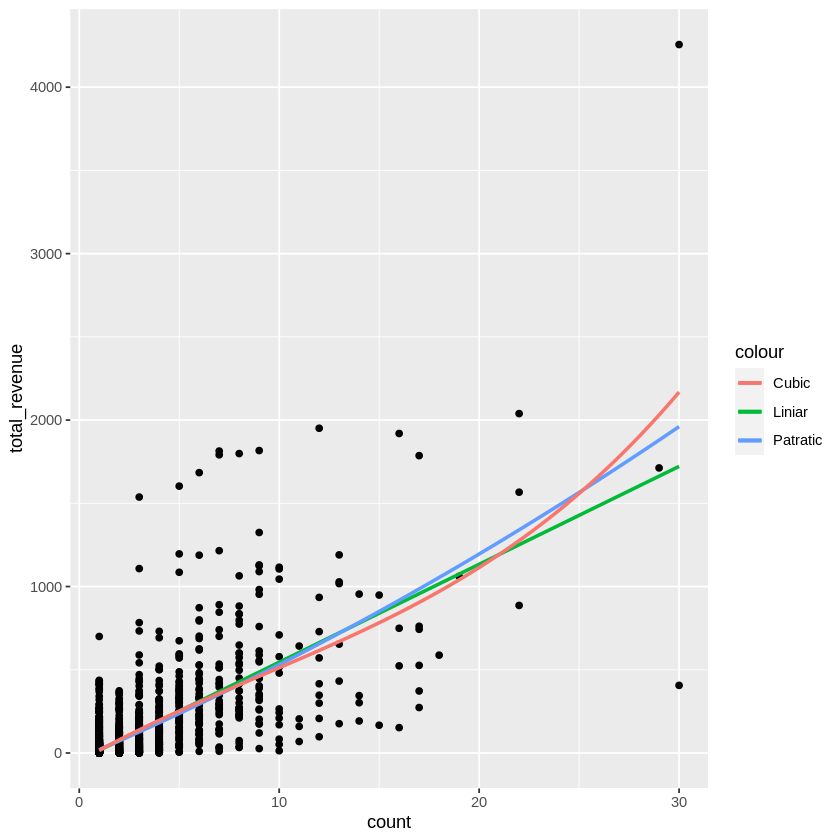

In [41]:
# total revenue of a director
ggplot(aux, aes(x = count, y = total_revenue)) +
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

`geom_smooth()` using formula 'y ~ x'


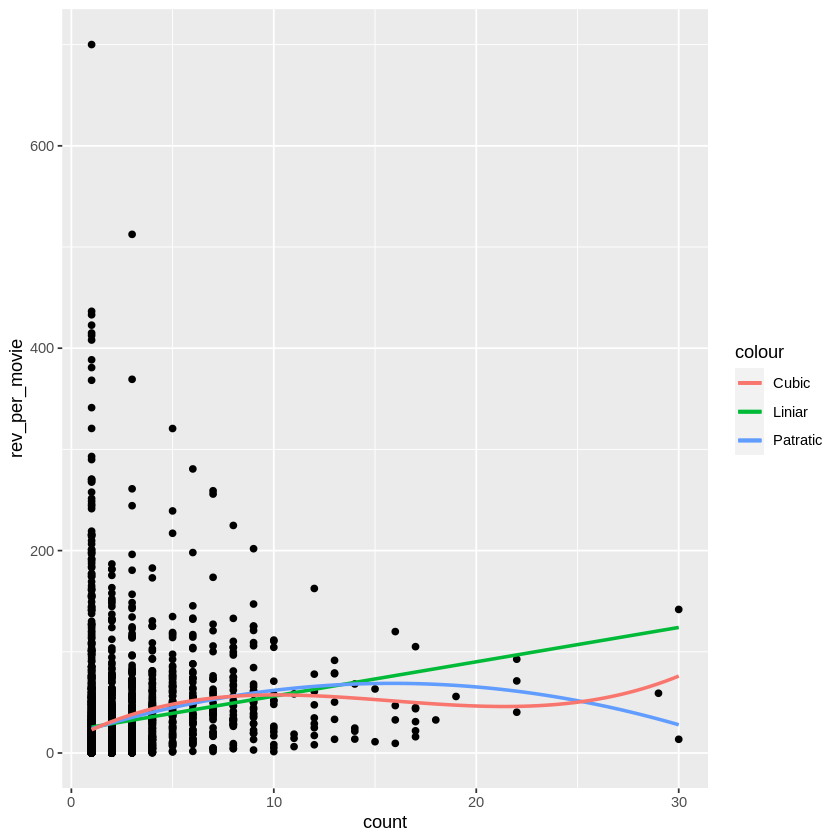

In [42]:
# mean revenue of a director per movie
ggplot(aux, aes(x = count, y = rev_per_movie)) +
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

`geom_smooth()` using formula 'y ~ x'


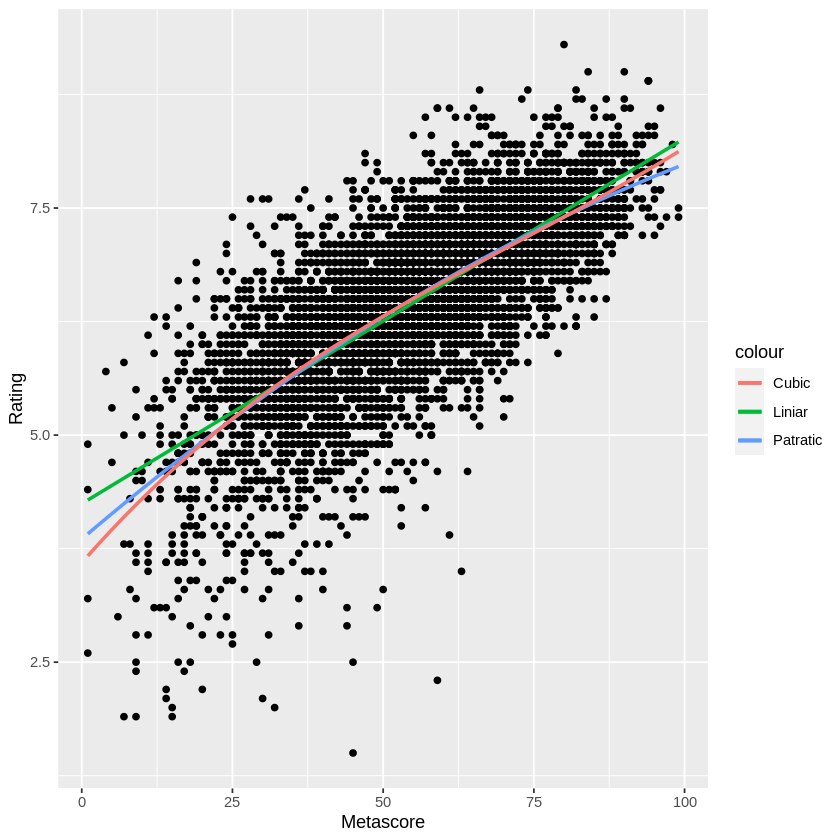

In [44]:
# Metascore ~ Rating
ggplot(dataset, aes(x = Metascore, y = Rating)) +
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                aes(color = "Liniar") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 2),
                se = FALSE,
                aes(color = "Patratic") ) +
    geom_smooth(method = "lm",
                formula = y ~ poly(x, 3),
                se = FALSE,
                aes(color = "Cubic") )

In [ ]:
## 4. Simple Linear Regression

In [ ]:
### 4.1 First regression

In [51]:

linear_reg <- lm(Revenue ~ Rating, data=dataset) 
summary(linear_reg)


Call:
lm(formula = Revenue ~ Rating, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-67.21 -37.07 -18.10  12.31 878.24 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.7896     5.6656  -7.199 6.82e-13 ***
Rating       12.5577     0.8694  14.445  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.65 on 5733 degrees of freedom
Multiple R-squared:  0.03512,	Adjusted R-squared:  0.03495 
F-statistic: 208.7 on 1 and 5733 DF,  p-value: < 2.2e-16


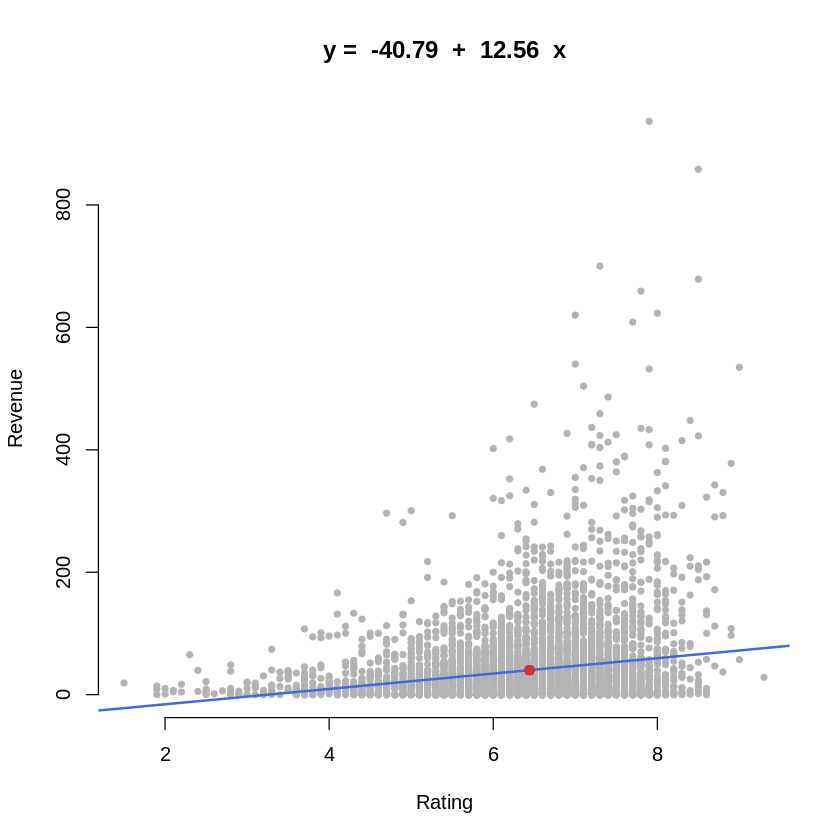

In [53]:
# results
plot(dataset$Rating, dataset$Revenue,
     xlab = "Rating",
     ylab = "Revenue",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b0, digits = 4), " + ",
                  format(b1, digits = 4), " x"))
abline(a = b0, b = b1, col = "royalblue", lwd = 2)

points(mean(dataset$Rating), mean(dataset$Revenue),
       pch = 16,
       col = "brown3",
       cex = 1.2)


In [52]:
# variance-covariance matrix
vcov(linear_reg)

,(Intercept),Rating
(Intercept),32.099414,-4.8692661
Rating,-4.869266,0.7557923


In [70]:
# ANOVA
anova(linear_reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Rating,1,871960.2,871960.180,208.6511,1.757618e-46
Residuals,5733,23958408.7,4179.035,NA,NA


In [58]:
confint(linear_reg)

,2.5 %,97.5 %
(Intercept),-51.89642,-29.68285
Rating,10.85346,14.26202


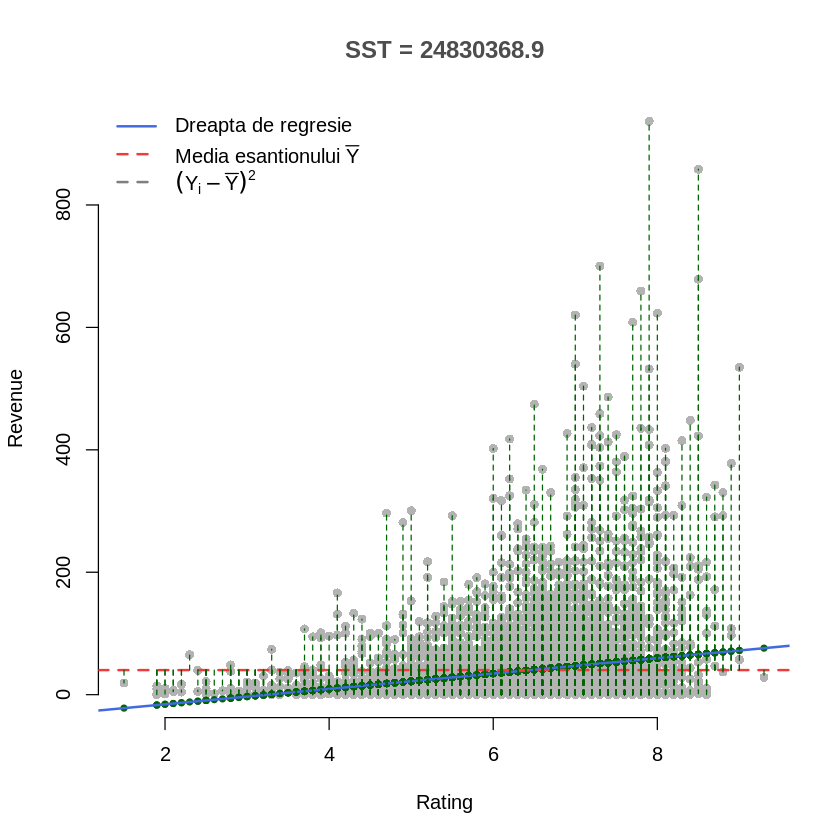

In [71]:
# SST
plot(dataset$Rating, dataset$Revenue, pch = 20, type = "n",
     main = paste("SST =", round(sum((dataset$Revenue -
                                      mean(dataset$Revenue))^2), 2)),
     col.main = "grey30",
     xlab = "Rating",
     ylab = "Revenue",
     bty = "n")
points(dataset$Rating, dataset$Revenue, pch = 16, col = "grey70")
points(dataset$Rating, linear_reg$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg$coefficients, col = "royalblue", lwd = 2)

abline(h = mean(dataset$Revenue), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$Rating, y0 = mean(dataset$Revenue),
         x1 = dataset$Rating, y1 = dataset$Revenue,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")


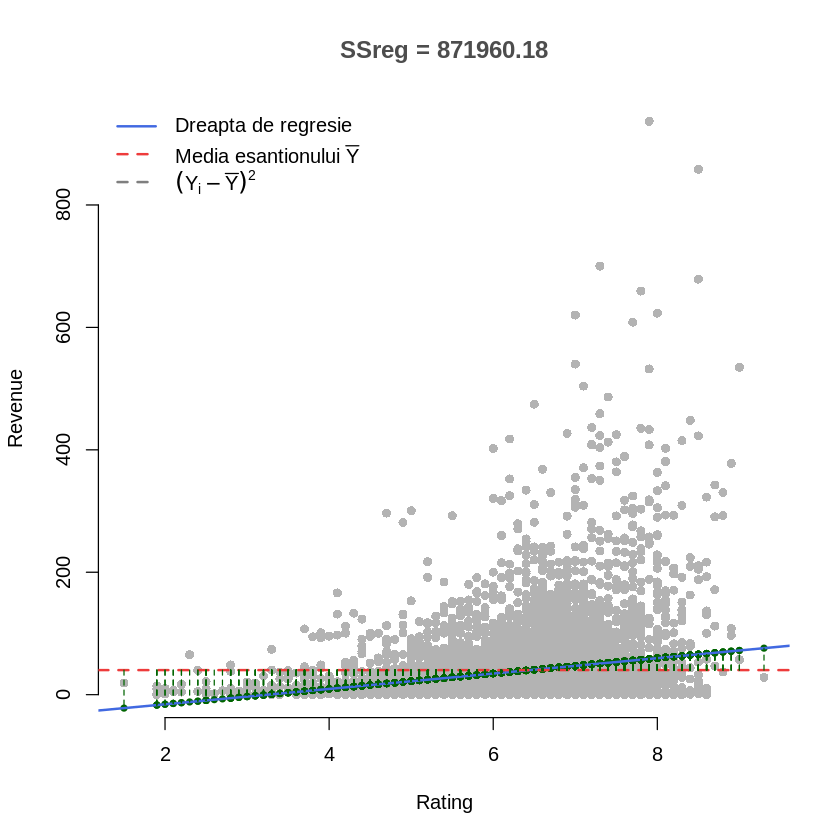

In [72]:
# SSreg
plot(dataset$Rating, dataset$Revenue, pch = 20, type = "n",
     main = paste("SSreg =", round(sum((linear_reg$fitted.values -
                                      mean(dataset$Revenue))^2), 2)),
     col.main = "grey30",
     xlab = "Rating",
     ylab = "Revenue",
     bty = "n")
points(dataset$Rating, dataset$Revenue, pch = 16, col = "grey70")
points(dataset$Rating, linear_reg$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg$coefficients, col = "royalblue", lwd = 2)

abline(h = mean(dataset$Revenue), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$Rating, y0 = mean(dataset$Revenue),
         x1 = dataset$Rating, y1 = linear_reg$fitted.values,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")


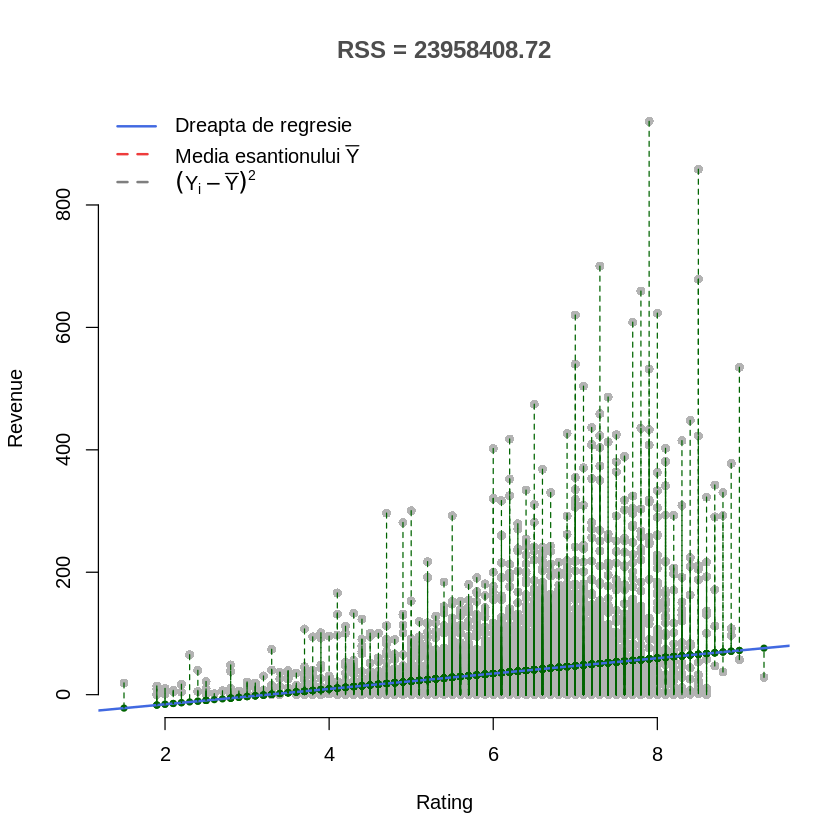

In [73]:
# RSS
plot(dataset$Rating, dataset$Revenue, pch = 20, type = "n",
     main = paste("RSS =", round(sum((dataset$Revenue -
                                      linear_reg$fitted.values)^2), 2)),
     col.main = "grey30",
     xlab = "Rating",
     ylab = "Revenue",
     bty = "n")
points(dataset$Rating, dataset$Revenue, pch = 16, col = "grey70")
points(dataset$Rating, linear_reg$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg$coefficients, col = "royalblue", lwd = 2)

segments(x0 = dataset$Rating, y0 = dataset$Revenue,
         x1 = dataset$Rating, y1 = linear_reg$fitted.values,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")


In [ ]:
### Second model

In [62]:

linear_reg2 <- lm(Rating ~ Metascore, data=dataset) 

b02 = linear_reg2$coefficients[1]
b12 = linear_reg2$coefficients[2]

summary(linear_reg2)


Call:
lm(formula = Rating ~ Metascore, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5549 -0.3756  0.0383  0.4233  2.2290 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.2446750  0.0287765  147.50   <2e-16 ***
Metascore   0.0402266  0.0005009   80.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6737 on 5733 degrees of freedom
Multiple R-squared:  0.5294,	Adjusted R-squared:  0.5294 
F-statistic:  6450 on 1 and 5733 DF,  p-value: < 2.2e-16


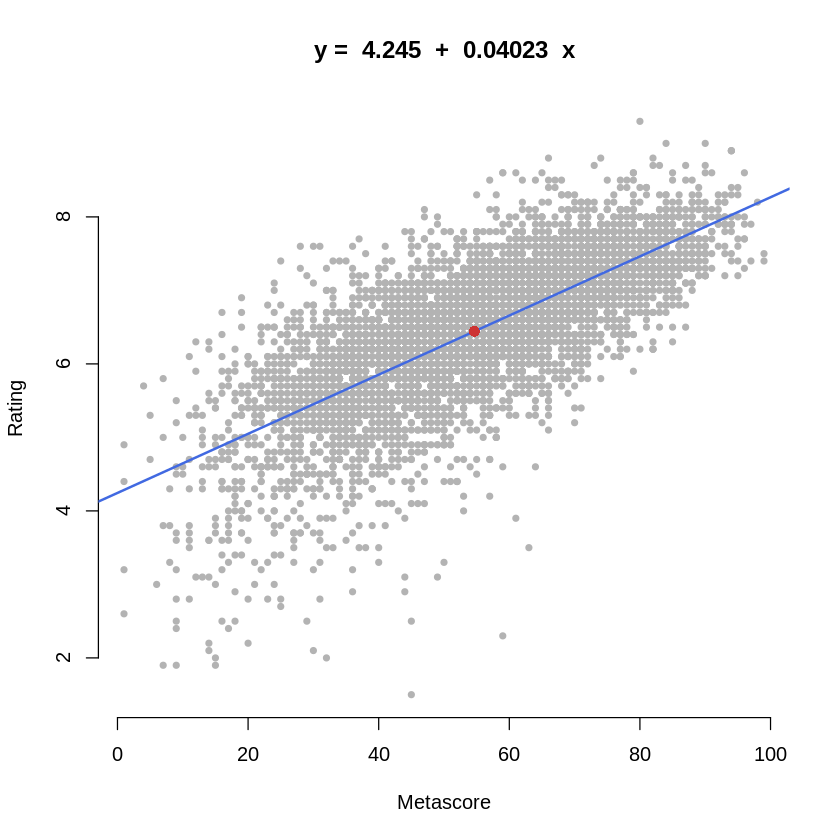

In [74]:
plot(dataset$Metascore, dataset$Rating,
     xlab = "Metascore",
     ylab = "Rating",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b02, digits = 4), " + ",
                  format(b12, digits = 4), " x"))
abline(a = b02, b = b12, col = "royalblue", lwd = 2)

points(mean(dataset$Metascore), mean(dataset$Rating),
       pch = 16,
       col = "brown3",
       cex = 1.2)

In [68]:
confint(linear_reg2)

,2.5 %,97.5 %
(Intercept),4.18826224,4.30108770
Metascore,0.03924471,0.04120851


In [67]:
vcov(linear_reg2)

,(Intercept),Metascore
(Intercept),8.280844e-04,-1.370731e-05
Metascore,-1.370731e-05,2.508726e-07


In [75]:
anova(linear_reg2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Metascore,1,2927.423,2927.4234731,6450.206,0
Residuals,5733,2601.920,0.4538496,NA,NA


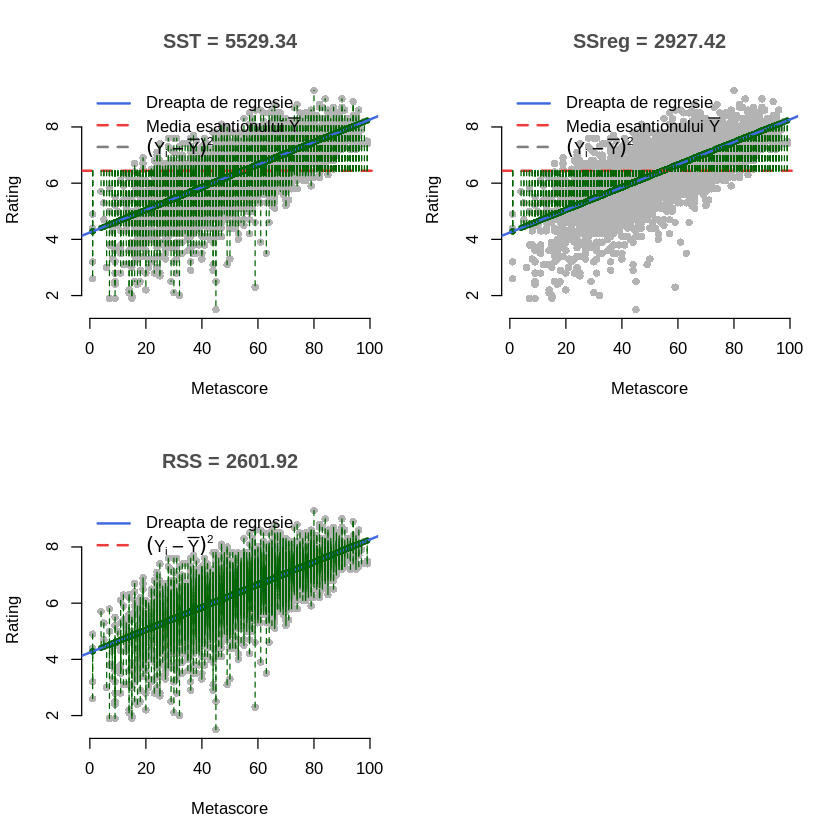

In [83]:
# SST, SSreg, RSS for the second model
par(mfrow=c(2,2))

plot(dataset$Metascore, dataset$Rating, pch = 20, type = "n",
     main = paste("SST =", round(sum((dataset$Rating -
                                      mean(dataset$Rating))^2), 2)),
     col.main = "grey30",
     xlab = "Metascore",
     ylab = "Rating",
     bty = "n")
points(dataset$Metascore, dataset$Rating, pch = 16, col = "grey70")
points(dataset$Metascore, linear_reg2$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg2$coefficients, col = "royalblue", lwd = 2)

abline(h = mean(dataset$Rating), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$Metascore, y0 = mean(dataset$Rating),
         x1 = dataset$Metascore, y1 = dataset$Rating,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")

plot(dataset$Metascore, dataset$Rating, pch = 20, type = "n",
     main = paste("SSreg =", round(sum((linear_reg2$fitted.values -
                                      mean(dataset$Rating))^2), 2)),
     col.main = "grey30",
     xlab = "Metascore",
     ylab = "Rating",
     bty = "n")
points(dataset$Metascore, dataset$Rating, pch = 16, col = "grey70")
points(dataset$Metascore, linear_reg2$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg2$coefficients, col = "royalblue", lwd = 2)

abline(h = mean(dataset$Rating), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$Metascore, y0 = mean(dataset$Rating),
         x1 = dataset$Metascore, y1 = linear_reg2$fitted.values,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")

plot(dataset$Metascore, dataset$Rating, pch = 20, type = "n",
     main = paste("RSS =", round(sum((dataset$Rating -
                                      linear_reg2$fitted.values)^2), 2)),
     col.main = "grey30",
     xlab = "Metascore",
     ylab = "Rating",
     bty = "n")
points(dataset$Metascore, dataset$Rating, pch = 16, col = "grey70")
points(dataset$Metascore, linear_reg2$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg2$coefficients, col = "royalblue", lwd = 2)

segments(x0 = dataset$Metascore, y0 = dataset$Rating,
         x1 = dataset$Metascore, y1 = linear_reg2$fitted.values,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie",
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2),
       col = c("royalblue", "brown2"),
       lty = c(1, 2),
       bty = "n")


In [ ]:
### 4.3 Third Version

In [77]:
linear_reg3 <- lm(Revenue ~ score, data=dataset) 

b03 = linear_reg3$coefficients[1]
b13 = linear_reg3$coefficients[2]

In [78]:
summary(linear_reg3)


Call:
lm(formula = Revenue ~ score, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-63.65 -37.09 -18.13  12.16 879.01 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.90197    4.04521  -2.695  0.00706 ** 
score         0.85696    0.06641  12.904  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.88 on 5733 degrees of freedom
Multiple R-squared:  0.02823,	Adjusted R-squared:  0.02806 
F-statistic: 166.5 on 1 and 5733 DF,  p-value: < 2.2e-16


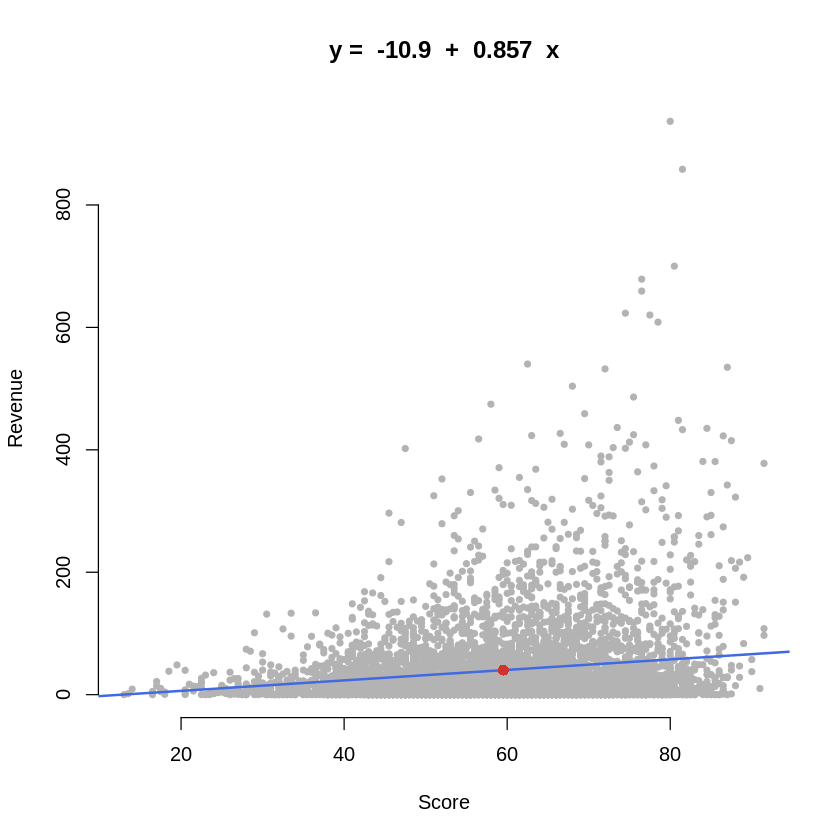

In [79]:

plot(dataset$score, dataset$Revenue,
     xlab = "Score",
     ylab = "Revenue",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b03, digits = 4), " + ",
                  format(b13, digits = 4), " x"))
abline(a = b03, b = b13, col = "royalblue", lwd = 2)

points(mean(dataset$score), mean(dataset$Revenue),
       pch = 16,
       col = "brown3",
       cex = 1.2)

In [80]:
confint(linear_reg3)

,2.5 %,97.5 %
(Intercept),-18.832109,-2.971838
score,0.726775,0.987147


In [81]:
anova(linear_reg3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
score,1,700873,700873.037,166.5225,1.412943e-37
Residuals,5733,24129496,4208.878,NA,NA


In [82]:
vcov(linear_reg3)

,(Intercept),score
(Intercept),16.3637058,-0.262543586
score,-0.2625436,0.004410106


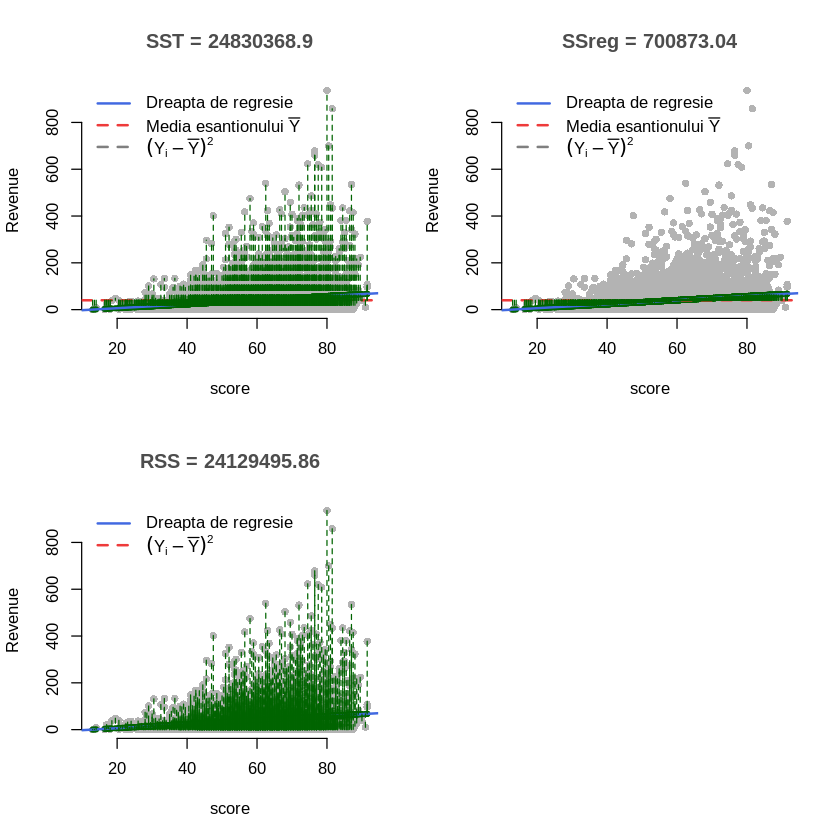

In [85]:

par(mfrow=c(2,2))


plot(dataset$score, dataset$Revenue, pch = 20, type = "n",
     main = paste("SST =", round(sum((dataset$Revenue -
                                      mean(dataset$Revenue))^2), 2)),
     col.main = "grey30",
     xlab = "score",
     ylab = "Revenue",
     bty = "n")
points(dataset$score, dataset$Revenue, pch = 16, col = "grey70")
points(dataset$score, linear_reg3$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg3$coefficients, col = "royalblue", lwd = 2)

abline(h = mean(dataset$Revenue), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$score, y0 = mean(dataset$Revenue),
         x1 = dataset$score, y1 = dataset$Revenue,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")

plot(dataset$score, dataset$Revenue, pch = 20, type = "n",
     main = paste("SSreg =", round(sum((linear_reg3$fitted.values -
                                      mean(dataset$Revenue))^2), 2)),
     col.main = "grey30",
     xlab = "score",
     ylab = "Revenue",
     bty = "n")
points(dataset$score, dataset$Revenue, pch = 16, col = "grey70")
points(dataset$score, linear_reg3$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg3$coefficients, col = "royalblue", lwd = 2)

abline(h = mean(dataset$Revenue), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$score, y0 = mean(dataset$Revenue),
         x1 = dataset$score, y1 = linear_reg3$fitted.values,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie", "Media esantionului " * bar(Y),
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2, 2),
       col = c("royalblue", "brown2", "grey50"),
       lty = c(1, 2, 2),
       bty = "n")

plot(dataset$score, dataset$Revenue, pch = 20, type = "n",
     main = paste("RSS =", round(sum((dataset$Revenue -
                                      linear_reg3$fitted.values)^2), 2)),
     col.main = "grey30",
     xlab = "score",
     ylab = "Revenue",
     bty = "n")
points(dataset$score, dataset$Revenue, pch = 16, col = "grey70")
points(dataset$score, linear_reg3$fitted.values, pch = 20, col = "darkgreen")

abline(linear_reg3$coefficients, col = "royalblue", lwd = 2)

# abline(h = mean(dataset$Revenue), col = "brown2", lty = 2, lwd = 2)

segments(x0 = dataset$score, y0 = dataset$Revenue,
         x1 = dataset$score, y1 = linear_reg3$fitted.values,
         col = "darkgreen", lwd = 1, lty = 2)
legend("topleft",
       legend = expression("Dreapta de regresie",
                           (Y[i] - bar(Y))^2),
       lwd = c(2, 2),
       col = c("royalblue", "brown2"),
       lty = c(1, 2),
       bty = "n")


In [ ]:
#### all models

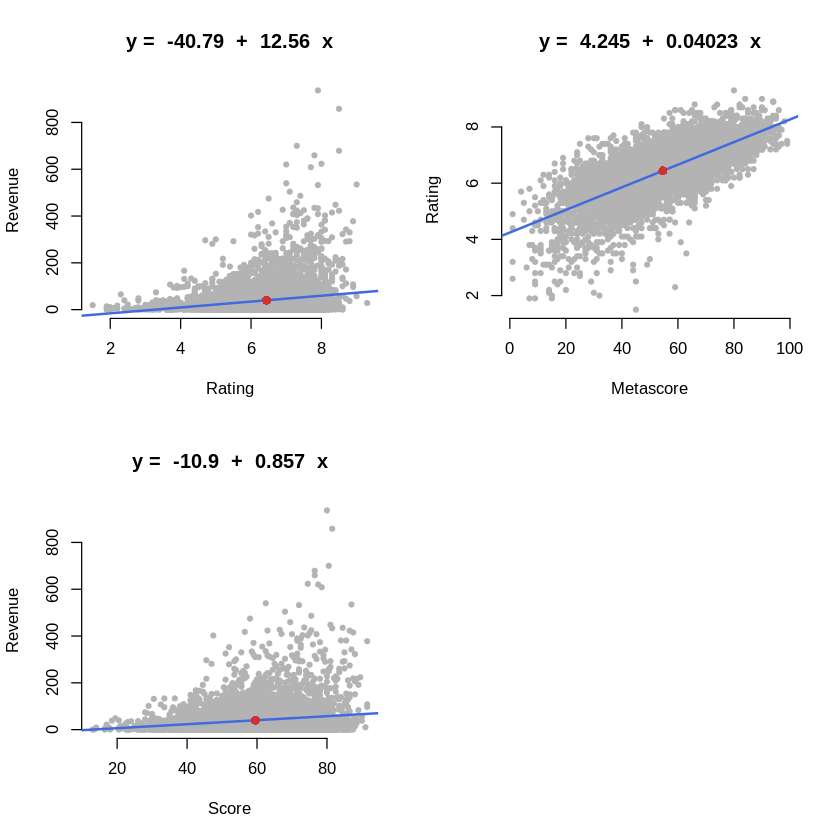

In [61]:
par(mfrow=c(2,2))

plot(dataset$Rating, dataset$Revenue,
     xlab = "Rating",
     ylab = "Revenue",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b0, digits = 4), " + ",
                  format(b1, digits = 4), " x"))
abline(a = b0, b = b1, col = "royalblue", lwd = 2)

points(mean(dataset$Rating), mean(dataset$Revenue),
       pch = 16,
       col = "brown3",
       cex = 1.2)

plot(dataset$Metascore, dataset$Rating,
     xlab = "Metascore",
     ylab = "Rating",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b02, digits = 4), " + ",
                  format(b12, digits = 4), " x"))
abline(a = b02, b = b12, col = "royalblue", lwd = 2)

points(mean(dataset$Metascore), mean(dataset$Rating),
       pch = 16,
       col = "brown3",
       cex = 1.2)

plot(dataset$score, dataset$Revenue,
     xlab = "Score",
     ylab = "Revenue",
     col = "grey70",
     pch = 20,
     bty="n",
     main = paste("y = ", format(b03, digits = 4), " + ",
                  format(b13, digits = 4), " x"))
abline(a = b03, b = b13, col = "royalblue", lwd = 2)

points(mean(dataset$score), mean(dataset$Revenue),
       pch = 16,
       col = "brown3",
       cex = 1.2)

In [ ]:
### 4.4 Prediction

In [87]:
set.seed(0) 
sample = sample.split(dataset$Id, SplitRatio = .80)
train = subset(dataset, sample == TRUE)
test  = subset(dataset, sample == FALSE)

In [88]:
dim(train)
dim(test)

[1] 4588   10

[1] 1147   10

In [89]:
linear_model <- lm(Revenue ~ Rating, data=train) 
summary(linear_model)


Call:
lm(formula = Revenue ~ Rating, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-66.48 -37.34 -17.87  12.39 878.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -37.8401     6.3061  -6.001 2.12e-09 ***
Rating       12.1298     0.9679  12.532  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.34 on 4586 degrees of freedom
Multiple R-squared:  0.03311,	Adjusted R-squared:  0.0329 
F-statistic:   157 on 1 and 4586 DF,  p-value: < 2.2e-16


In [ ]:
# qqnorm(dataset$Revenue)
# qqline(dataset$Revenue, col = "steelblue", lwd = 2)
# qqplot(dataset$Rating, dataset$Revenue)

In [90]:
shapiro.test(residuals(linear_model))


	Shapiro-Wilk normality test

data:  residuals(linear_model)
W = 0.67243, p-value < 2.2e-16


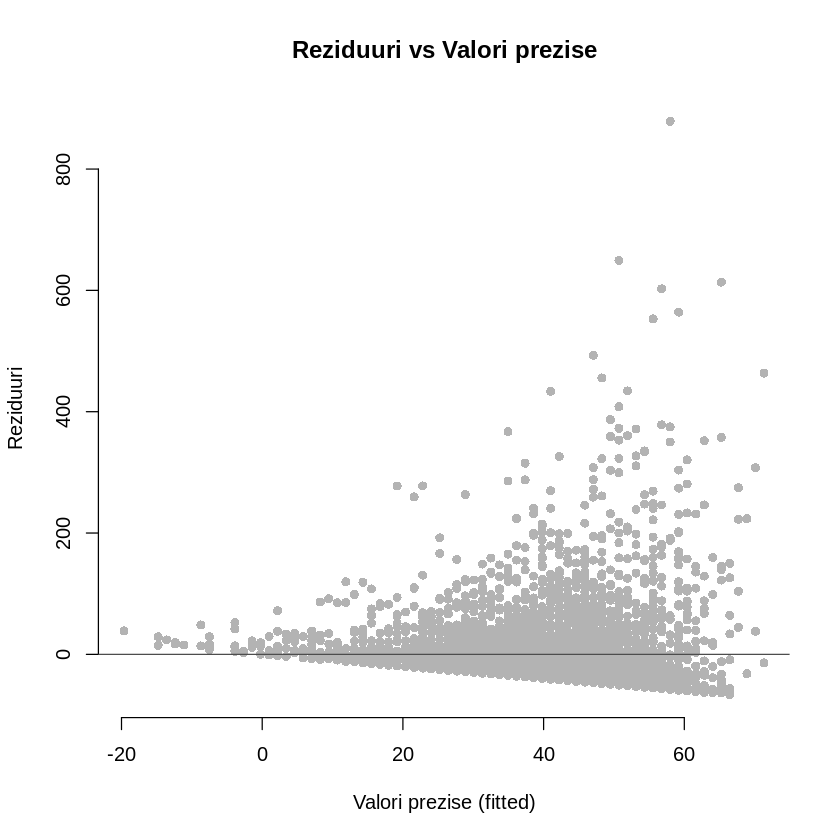

In [91]:
plot(residuals(linear_model)~fitted(linear_model),
     col = "grey70", pch = 16,
     xlab = "Valori prezise (fitted)",
     ylab = "Reziduuri",
     main = "Reziduuri vs Valori prezise",
     bty = "n")
abline(h = 0, col = "grey30")


Call:
lm(formula = sqrt(Revenue) ~ Rating, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1849 -3.4943 -0.4553  2.2903 24.8667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.69686    0.35718   1.951   0.0511 .  
Rating       0.63814    0.05481  11.643   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.075 on 5733 degrees of freedom
Multiple R-squared:  0.0231,	Adjusted R-squared:  0.02293 
F-statistic: 135.6 on 1 and 5733 DF,  p-value: < 2.2e-16


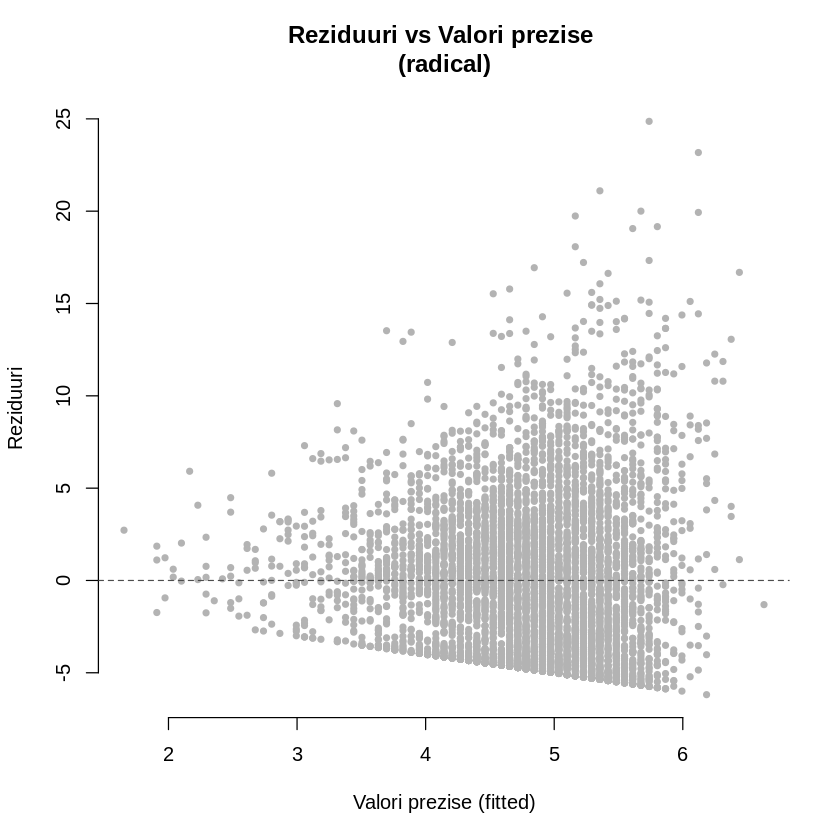

In [92]:

linear_model_sqrt = lm(sqrt(Revenue) ~ Rating, data = dataset)
summary(linear_model_sqrt)

plot(residuals(linear_model_sqrt)~fitted(linear_model_sqrt),
     col = "grey70", pch = 20,
     xlab = "Valori prezise (fitted)",
     ylab = "Reziduuri",
     main = "Reziduuri vs Valori prezise \n(radical)",
     bty = "n")
abline(h = 0, col = "grey30", lty = 2)

In [99]:
# accuracy of the prediction
prediction <- predict(linear_model, test)
true_val_pred <- data.frame(cbind(actuals=test$Revenue, predicteds=prediction))
head(true_val_pred)

correlation_accuracy <- cor(true_val_pred)
correlation_accuracy

,actuals,predicteds
1,858.37,65.26287
5,0.43,56.77204
7,171.02,53.13311
8,426.83,45.85525
19,135.37,56.77204
22,0.00,53.13311


,actuals,predicteds
actuals,1.0000000,0.2085938
predicteds,0.2085938,1.0000000


In [111]:
# min-max accuracy and mean squared error for test data
min_max_accuracy <- mean(apply(true_val_pred, 1, min) / apply(true_val_pred, 1, max))  
mse <- (sum(true_val_pred$predicteds - true_val_pred$actuals)**2)/dim(test)[1] 

min_max_accuracy
mse

[1] 0.3247832

[1] 1059.622

In [ ]:
## 5. Multiple Regression

In [112]:
multiple_reg <- lm(Revenue ~ Year + Votes + Runtime + mpd + Rating + Metascore, data=dataset)
summary(multiple_reg)


Call:
lm(formula = Revenue ~ Year + Votes + Runtime + mpd + Rating + 
    Metascore, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-534.76  -20.86   -9.54    9.15  704.26 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.893e+02  1.265e+02  -3.868 0.000111 ***
Year         2.584e-01  6.284e-02   4.111 3.99e-05 ***
Votes        2.560e-04  4.819e-06  53.124  < 2e-16 ***
Runtime      3.263e-01  4.278e-02   7.627 2.80e-14 ***
mpd          3.296e-01  1.339e-01   2.461 0.013871 *  
Rating      -8.518e+00  1.081e+00  -7.879 3.92e-15 ***
Metascore    1.310e-01  5.542e-02   2.364 0.018117 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.97 on 5728 degrees of freedom
Multiple R-squared:  0.4007,	Adjusted R-squared:  0.4001 
F-statistic: 638.3 on 6 and 5728 DF,  p-value: < 2.2e-16


In [113]:
multiple_reg2 <- lm(Revenue ~ Votes + Rating , data=dataset)
summary(multiple_reg2) 


Call:
lm(formula = Revenue ~ Votes + Rating, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-557.93  -19.93  -11.60    9.01  707.75 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.947e+01  4.766e+00  10.381  < 2e-16 ***
Votes        2.684e-04  4.642e-06  57.825  < 2e-16 ***
Rating      -5.260e+00  7.566e-01  -6.953 3.98e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.38 on 5732 degrees of freedom
Multiple R-squared:  0.3906,	Adjusted R-squared:  0.3904 
F-statistic:  1837 on 2 and 5732 DF,  p-value: < 2.2e-16


In [114]:
multiple_reg3 <- lm(Revenue ~ Year + Votes + Runtime + mpd + score, data=dataset)
summary(multiple_reg3)


Call:
lm(formula = Revenue ~ Year + Votes + Runtime + mpd + score, 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-530.83  -20.61  -10.19    9.04  708.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.795e+02  1.262e+02  -4.593 4.47e-06 ***
Year         2.924e-01  6.285e-02   4.652 3.36e-06 ***
Votes        2.494e-04  4.728e-06  52.753  < 2e-16 ***
Runtime      2.862e-01  4.248e-02   6.737 1.77e-11 ***
mpd          3.673e-01  1.343e-01   2.735  0.00625 ** 
score       -3.513e-01  5.816e-02  -6.041 1.63e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.15 on 5729 degrees of freedom
Multiple R-squared:  0.3963,	Adjusted R-squared:  0.3958 
F-statistic: 752.2 on 5 and 5729 DF,  p-value: < 2.2e-16


In [115]:
# ANOVA 
anova(multiple_reg, multiple_reg2, multiple_reg3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
5728,14880596,NA,NA,NA,NA
5732,15131577,-4,-250980.6,24.15254,7.622489e-20
5729,14990079,3,141497.3,18.15555,1.010096e-11
